**CNN MODEL BUILDING**

All images in CROCUFID are high-quality standardized 8 bits color pictures with a resolution of 5184 pixels × 3456 pixels. For the validation studies reported in this paper the images were reduced in size to 1037 pixels × 691 pixels.

In [ ]:
# 1. Importing Libraries

#Python packages
import numpy as np
import pandas as pd

#Plotting
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Model Building
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers,models


In [ ]:
# 2. Importing Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#3. Defining path to access the data files from google Drive
os.chdir('/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/asian')
os.getcwd()
path = '/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/asian'
target = os.listdir(path)
labels = np.arange(0,len(target)).tolist()
print(target,'\n',labels, len(labels))


In [ ]:
# Errors Trying different plotting methods:
# 1. cv.imread
# img = cv2.imread('/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/asian/0411.jpg')
# cv2.imshow("Asian",img)
# #2. PIL Image
# from PIL import Image
# image=Image.open(r"/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/asian/0411.jpg")
# image.show()

In [ ]:
# EXAMPLE CODE FOR REFERENCE

# Example 1: for image display using matplotlib image
# im1 = mpimg.imread('/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/asian/0411.jpg')
# plt.imshow(im1)
# plt.show()

# Example 2: Getting single image size
# p1 = '/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/'+data + '/'
# file = os.listdir(p1)
# im1 = cv2.imread(p1+file[0])
# im1.shape[:4]

#Example 3: For one hot encoding:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(data.target)
# y_train

In [ ]:
# 4. Creating the lists for creating the data frame
img_list =[]
cuisine_list =[]
cuisine =  []

for data in target:
  names= os.walk('/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/'+data)
  for path,j,images in names:
    length_of_images = len(images)
    #print('Cuisine is :{}, type is: {}'.format(data, type(data)))

    img_list.extend(images)
    cuisine = [data for x in range(0,length_of_images)]
    cuisine_list.extend(cuisine)

print(img_list)
print(cuisine_list)

['0590.jpg', '0589.jpg', '0588.jpg', '0090.jpg', '0088.jpg', '0089.jpg', '0086.jpg', '0087.jpg', '0104.jpg', '0107.jpg', '0108.jpg', '0106.jpg', '0112.jpg', '0111.jpg', '0109.jpg', '0113.jpg', '0114.jpg', '0122.jpg', '0152.jpg', '0153.jpg', '0154.jpg', '0167.jpg', '0166.jpg', '0184.jpg', '0185.jpg', '0190.jpg', '0189.jpg', '0191.jpg', '0227.jpg', '0340.jpg', '0342.jpg', '0341.jpg', '0966.jpg', '0959.jpg', '0963.jpg', '0956.jpg', '0964.jpg', '0961.jpg', '0967.jpg', '0954.jpg', '0958.jpg', '0957.jpg', '0962.jpg', '0965.jpg', '0960.jpg', '0979.jpg', '0983.jpg', '0984.jpg', '0981.jpg', '0982.jpg', '0969.jpg', '0986.jpg', '0975.jpg', '0974.jpg', '0972.jpg', '0985.jpg', '0973.jpg', '0976.jpg', '0980.jpg', '0968.jpg', '0977.jpg', '0978.jpg', '0971.jpg', '0970.jpg', '0001.jpg', '0004.jpg', '0002.jpg', '0003.jpg', '0009.jpg', '0011.jpg', '0010.jpg', '0013.jpg', '0015.jpg', '0016.jpg', '0018.jpg', '0020.jpg', '0019.jpg', '0023.jpg', '0031.jpg', '0030.jpg', '0026.jpg', '0027.jpg', '0025.jpg', '00

In [ ]:
data = pd.DataFrame({'images': img_list,'cuisine': cuisine_list})
data.head(20)

,images,cuisine
0,0590.jpg,african
1,0589.jpg,african
2,0588.jpg,african
3,0090.jpg,unappealing
4,0088.jpg,unappealing
5,0089.jpg,unappealing
6,0086.jpg,unappealing
7,0087.jpg,unappealing
8,0104.jpg,unappealing
9,0107.jpg,unappealing


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['target']=le.fit_transform(data.cuisine)
data

,images,cuisine,target
0,0590.jpg,african,0
1,0589.jpg,african,0
2,0588.jpg,african,0
3,0090.jpg,unappealing,3
4,0088.jpg,unappealing,3
...,...,...,...
880,0929.jpg,asian,1
881,0932.jpg,asian,1
882,0930.jpg,asian,1
883,0931.jpg,asian,1


In [ ]:
print(data.cuisine.unique())
print(data.info())

['african' 'unappealing' 'universal' 'non_food' 'western' 'asian']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   images   885 non-null    object
 1   cuisine  885 non-null    object
 2   target   885 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 20.9+ KB
None


In [ ]:
# 4. Function to display images and obtain image size
def display_image(target):
    for data in target:
      #Prepare first image from each cuisine
      p1 = '/content/gdrive/My Drive/YOLO/data/Plated_Foods/train/'+data + '/'
      file = os.listdir(p1)
      img=mpimg.imread(p1+file[0])
      #print(p1+file[0])

      # Display
      #plt.title(data)
      #plt.imshow(img)
      #plt.show()

      #Checking image size
      im1 = cv2.imread(p1+file[0])
      #      print(im1.shape[:4])
      #Normalizing the images
      #im1 =im1/255.0
      #print(im1)
      size  = im1.shape[:4]
    return size
display_image(target)

(3456, 5184, 3)

In [ ]:
# 5. DEFINING HYPER PARAMETERS FOR CNN MODEL
# Observation: Adding just 2 layers was leading to Out of Memory error. Adding more Conv2D layers helped removing the error in ANN model
size = display_image(target)
filters = int(size[0]/2)
kernels = (3,3)
output_length = len(labels)
print("Size={}, Filters = {}, Kernels = {}, Number of Classes={}".format(size, filters, kernels, output_length))

cnn_models = models.Sequential()
cnn_models.add(layers.Conv2D(input_shape=size,filters = filters, kernel_size=kernels,activation='relu'))
cnn_models.add(layers.MaxPooling2D((2,2))) #1
cnn_models.add(layers.Conv2D(filters = filters/2, kernel_size=kernels,activation='relu'))
cnn_models.add(layers.MaxPooling2D((2,2))) #2
cnn_models.add(layers.Conv2D(filters = int(filters/4), kernel_size=kernels,activation='relu'))
cnn_models.add(layers.MaxPooling2D((2,2))) #3
cnn_models.add(layers.Conv2D(filters = int(filters/8), kernel_size=kernels,activation='relu'))
cnn_models.add(layers.MaxPooling2D((2,2))) #4
cnn_models.add(layers.Conv2D(filters = int(filters/16), kernel_size=kernels,activation='relu'))
cnn_models.add(layers.MaxPooling2D((2,2))) #5
cnn_models.add(layers.Conv2D(filters = int(filters/16), kernel_size=kernels,activation='relu'))
#cnn_models.add(layers.MaxPooling2D((2,2))) #6

#cnn_models.add(layers.Conv2D(filters = int(filters/32), kernel_size=kernels,activation='relu'))

cnn_models.summary()

Size=(3456, 5184, 3), Filters = 1728, Kernels = (3, 3), Number of Classes=6
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3454, 5182, 1728)  48384     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1727, 2591, 1728)  0        
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1725, 2589, 1728)  26875584  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 862, 1294, 1728)  0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 860, 1292, 864)    13437792  
                                              

In [ ]:
# ANN MODEL:
cnn_models.add(layers.Flatten())
cnn_models.add(layers.Dense(108,activation='relu', input_shape=(104,158)))
cnn_models.add(layers.Dense(output_length,activation='softmax'))
cnn_models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3454, 5182, 1728)  48384     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1727, 2591, 1728)  0        
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1725, 2589, 1728)  26875584  
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 862, 1294, 1728)  0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 860, 1292, 864)    13437792  
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 430, 646, 864)    0

In [ ]:
x = data['images']
y = data['target']


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=None)

In [ ]:
y_train.shape, x_train.shape

((663,), (663,))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
#x_train = to_categorical(data.images)
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
cnn_models.compile(optimizer='adam', loss='CategoricalCrossEntropy', metrics=['accuracy'])
cnn_models.fit(x=x_train,y=y_train,batch_size=100, epochs=1)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)



##  ----CNN ENDS---


**YOLO MODEL BUILDING**

In [ ]:
# 1. Install Libraries and Packages

!pip install ultralytics
from ultralytics import YOLO

In [ ]:
# Load the TensorBoard notebook extension
#%load_ext tensorboard

In [ ]:
# 2. list the folders in my drive and then list the folders in data folder
!ls '/content/gdrive/My Drive/YOLO/data'

In [ ]:
# 3. Save the data directory path
DATA_DIR = '/content/gdrive/My Drive/YOLO/data/Plated_Foods/'

In [ ]:
# 4.
# a. building YOLO pre trained model
# b. Training the model on dataset in my drive
model = YOLO("yolov8n-cls.pt")
result = model.train(data=DATA_DIR, epochs=2, imgsz=64)


In [ ]:
#5. Transferring results from Tensorboard to google drive speicified path
!scp -r /content/runs '/content/gdrive/My Drive/YOLO/'

In [ ]:
# 6. Pulling results from results.csv in runs folder

results_path= '/content/gdrive/My Drive/YOLO/runs/classify/train4/results.csv'
result = pd.read_csv(results_path)
result.head(10)

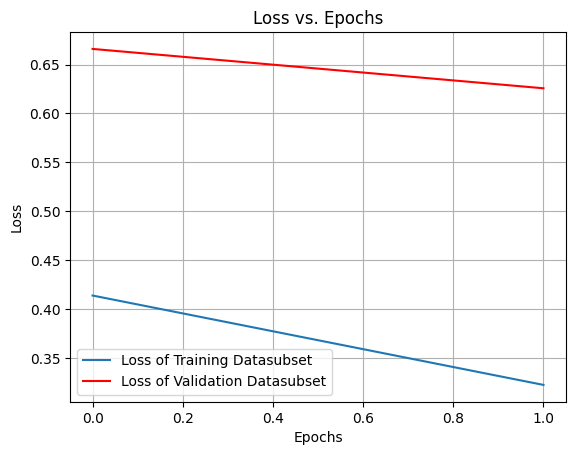

In [ ]:
# 7. Plotting accuracy for different epochs
plt.figure()
plt.plot(result['                  epoch'], result['             train/loss'], label = 'Loss of Training Datasubset')
plt.plot(result['                  epoch'], result['               val/loss'], label = 'Loss of Validation Datasubset', c = 'red')
plt.grid()
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()